In [ ]:
%pip install nbdt

In [1]:
from nbdt.model import SoftNBDT
from nbdt.model import HardNBDT
from nbdt.models import ResNet18, wrn28_10_cifar10, wrn28_10_cifar100, wrn28_10  # use wrn28_10 for TinyImagenet200
from torchvision import transforms
from nbdt.utils import DATASET_TO_CLASSES, load_image_from_path, maybe_install_wordnet
from IPython.display import display
import foolbox as fb
import torch
import torchvision
#import advertorch as at
from PIL import Image

not enough values to unpack (expected 2, got 0)


In [2]:
model_c = wrn28_10_cifar10()
#model.linear = torch.nn.Linear(in_features=512, out_features=200, bias=True)
model_c = HardNBDT(
  pretrained=True,
  dataset='CIFAR10',
  arch='wrn28_10_cifar10',
  hierarchy='wordnet',
  model=model)

transforms_c = transforms.Compose([
  transforms.Resize(32),
  transforms.CenterCrop(32),
  transforms.ToTensor(),
  transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

NameError: name 'model' is not defined

In [3]:
# Import ResNet18 pretrained on TinyImageNet. Wrapping with HardNBDT.
model = ResNet18()
model.linear = torch.nn.Linear(in_features=512, out_features=200, bias=True)
model = HardNBDT(
  pretrained=True,
  dataset='TinyImagenet200',
  arch='ResNet18',
  hierarchy='wordnet',
  model=model)

transforms_t = transforms.Compose([
  transforms.Resize(32),
  transforms.CenterCrop(32),
  transforms.ToTensor(),
  transforms.Normalize([0.4802, 0.4481, 0.3975], [0.2302, 0.2265, 0.2262]),
])

In [30]:
# Import ResNet18 pretrained on TinyImageNet. Wrapping with SoftNBDT.
model = ResNet18()
model.linear = torch.nn.Linear(in_features=512, out_features=200, bias=True)
model = SoftNBDT(
  pretrained=True,
  dataset='TinyImagenet200',
  arch='ResNet18',
  hierarchy='wordnet',
  model=model)

transforms_s = transforms.Compose([
  transforms.Resize(32),
  transforms.CenterCrop(32),
  transforms.ToTensor(),
  transforms.Normalize([0.4802, 0.4481, 0.3975], [0.2302, 0.2265, 0.2262]),
])

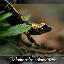

In [7]:
test_0 = load_image_from_path('./test_0.jpeg')
display(test_0)

In [ ]:
test_1 = load_image_from_path('./test_1.jpeg')

In [ ]:
def tree_pred(img):
    x = transforms(img)[None]
    outputs = model.forward_with_decisions(x)
    print(outputs[1])

In [ ]:
x = transforms(test_0)[None]
outputs = model.forward_with_decisions(x)
_, predicted = outputs[0].max(1)
#cls = DATASET_TO_CLASSES['CIFAR10'][predicted[0]]

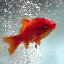

In [12]:
original = load_image_from_path('./test_1.jpeg')
display(original)

In [ ]:
tree_pred(test_0)

In [33]:
torch.no_grad()

In [21]:
import advertorch as at
gradient_model = at.attacks.GradientSignAttack(model)

In [24]:
gradient_model

In [36]:
with torch.no_grad():
    x = transforms_s(test_1)[None]
    x.requires_grad=True
    outputs = gradient_model.perturb(x)

RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

In [ ]:
tree_pred(test_1, gradient_model)

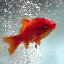

In [5]:
test_1

In [6]:
from PIL import Image, ImageFilter  
test_1 = test_1.filter(ImageFilter.GaussianBlur(radius = 2)) 

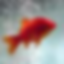

In [7]:
display(test_1)

In [ ]:
tree_pred(test_1)

In [9]:
x = transforms_t(test_1)[None]
outputs = model.forward_with_decisions(x)
outputs

(tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0.]]),
 [[{'node': <nbdt.data.custom.Node at 0x12331b198>, 'name': 'root', 'prob': 1

In [14]:
c = transforms_c(test_1)[None]
outputs = model.forward_with_decisions(c)
outputs

(tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0.]]),
 [[{'node': <nbdt.data.custom.Node at 0x12331b198>, 'name': 'root', 'prob': 1

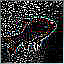

In [13]:
test_2 = original.filter(ImageFilter.FIND_EDGES)
display(test_2)

In [15]:
edge = transforms_t(test_2)[None]
outputs = model.forward_with_decisions(edge)
outputs

(tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
          0., 0.]]),
 [[{'node': <nbdt.data.custom.Node at 0x12331b198>, 'name': 'root', 'prob': 1